# <font color = blue>STEP 1 : READING AND UNDERSTANDING THE DATA

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Suppressing warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset

leadscore_df = pd.read_csv('Leads.csv')

pd.set_option('display.max_columns',None)

In [4]:
# Viewing the head of the dataframe

leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Unnamed: 37
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,NaN
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,NaN
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,NaN
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,NaN


In [5]:
# Finding the shape of the dataframe

leadscore_df.shape

(9240, 38)

In [6]:
# Checking the general summary of the dataframe

leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 38 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking the statistical summary of the dataframe

leadscore_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Unnamed: 37
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000,0.0
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883,NaN
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395,NaN
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000,NaN
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000,NaN
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000,NaN
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000,NaN
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000,NaN


# <font color = blue>STEP 2 : DATA PREPARATION

## 2.1 CHECKING DUPLICATE VALUES

In [8]:
# checking duplicates

leadscore_df.duplicated().sum()

0

- There are no duplicated values in the dataframe.

## 2.2 DROPPING REDUNDANT VARIABLES

In [9]:
# Finding the number of unique values in each column

leadscore_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

- By observing the unique values in the dataframe, we can see that the variables `Prospect ID` and `Lead Number` have unique values. So, we can drop them.
- By observing the data dictionary, we can find the variables `City` and `Country` are redundant since the education company sells online courses.

In [10]:
# shape before dropping columns

leadscore_df.shape

(9240, 38)

In [11]:
leadscore_df = leadscore_df.drop(['Prospect ID','Lead Number','City','Country'],axis = 1)

# shape after dropping columns

leadscore_df.shape

(9240, 34)

## 2.3 HANDLING MISSING VALUES

In [12]:
# Checking for missing values in columns

((100 * leadscore_df.isnull().sum())/ len(leadscore_df)).sort_values(ascending = False)

Unnamed: 37                                      100.000000
Lead Quality                                      51.590909
Asymmetrique Activity Index                       45.649351
Asymmetrique Profile Score                        45.649351
Asymmetrique Profile Index                        45.649351
Asymmetrique Activity Score                       45.649351
Tags                                              36.287879
Lead Profile                                      29.318182
What matters most to you in choosing a course     29.318182
What is your current occupation                   29.112554
How did you hear about X Education                23.885281
Specialization                                    15.562771
Page Views Per Visit                               1.482684
TotalVisits                                        1.482684
Last Activity                                      1.114719
Lead Source                                        0.389610
A free copy of Mastering The Interview  

- We have the null percentage for each column. We can drop the columns with null percentage greater than 35%, as imputing them will lead to bias in the analysis.

In [13]:
# Dropping the columns whose null percentage is greater than 35.

leadscore_df = leadscore_df.loc[:,(100 * leadscore_df.isnull().sum())/ len(leadscore_df) < 35]

# Shape after dropping

leadscore_df.shape

(9240, 27)

In [14]:
# Checking for missing values in rows

missing_rows = (100 * leadscore_df.isnull().sum(axis = 1))/leadscore_df.shape[1]
missing_rows[missing_rows > 40]

Series([], dtype: float64)

- There are no rows with missing values greater than 40%.

### 2.3.1 MISSING VALUE TREATMENT FOR NUMERICAL DATA

In [15]:
# Segmenting Numerical Variables

num_var = leadscore_df.select_dtypes(include = ['float', 'integer']).columns

num_var

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [16]:
# Checking the null percentage

for i in num_var:
    print(i,' - ',round((100 * leadscore_df[i].isnull().sum())/len(leadscore_df),2))

Converted  -  0.0
TotalVisits  -  1.48
Total Time Spent on Website  -  0.0
Page Views Per Visit  -  1.48


- Out of these 4 numerical columns, the columns `TotalVisits` and `Page Views Per Visit` have null percentage as 1.48.
- These null values are MNAR values. They are missing because, the customer may not have visited the website. Therefore, we can impute these values with the median values.

In [17]:
# Replacing the null values with median values

for i in ['TotalVisits','Page Views Per Visit']:
    leadscore_df[i] = leadscore_df[i].replace(np.nan,leadscore_df[i].median())

In [18]:
# Checking the null percentage

for i in num_var:
    print(i,' - ',round((100 * leadscore_df[i].isnull().sum())/len(leadscore_df),2))

Converted  -  0.0
TotalVisits  -  0.0
Total Time Spent on Website  -  0.0
Page Views Per Visit  -  0.0


- We have successfully handled the missing values in the numerical variables.

### 2.3.2 MISSING VALUE TREATMENT FOR CATEGORICAL DATA

In [19]:
# Segmenting the categorical variables

cat_var = leadscore_df.select_dtypes(include = 'object').columns

cat_var

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
# Checking the null percentage

((100 * leadscore_df.isnull().sum())/ len(leadscore_df)).sort_values(ascending = False)

Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Search                                            0.0000

- From the above observations, we can conclude that the following categorical columns have null values.
    1. Lead Profile
    2. What matters most to you in choosing a course
    3. What is your current occupation
    4. How did you hear about X Education
    5. Specialization
    6. Last Activity
    7. Lead Source
- Let's view their category distributions of all the categorical variables.

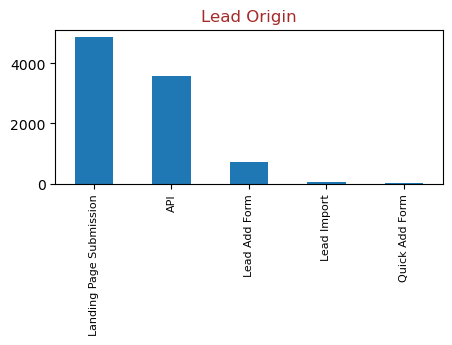

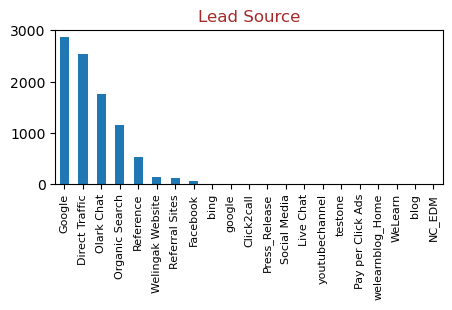

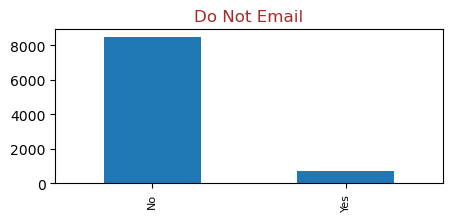

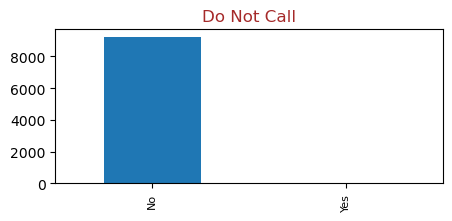

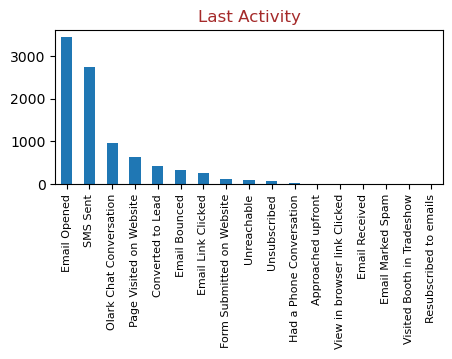

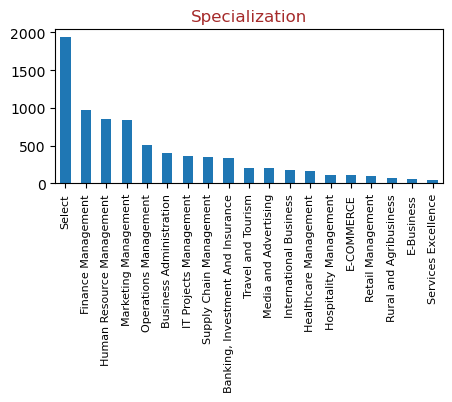

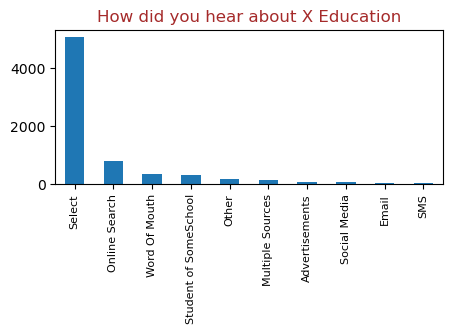

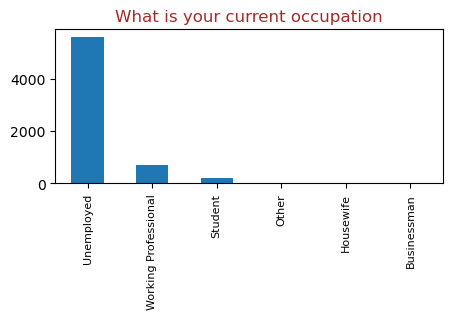

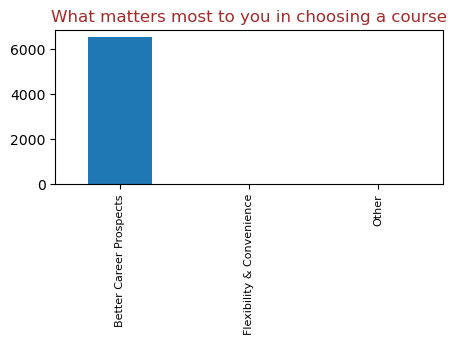

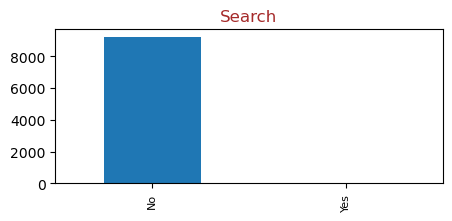

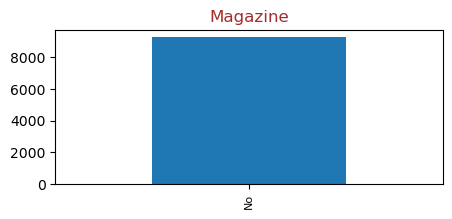

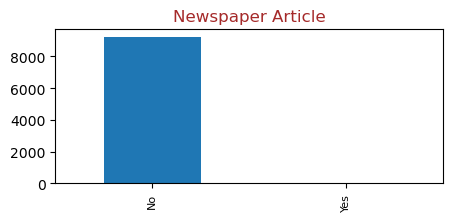

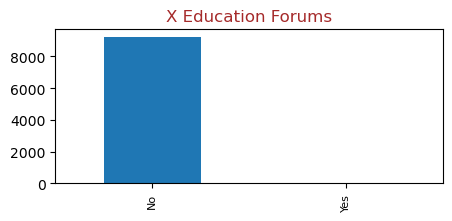

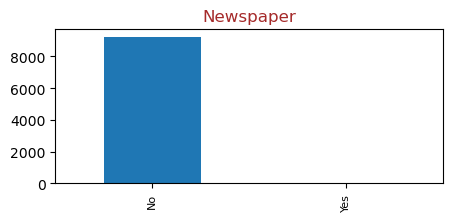

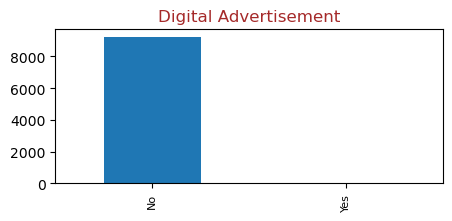

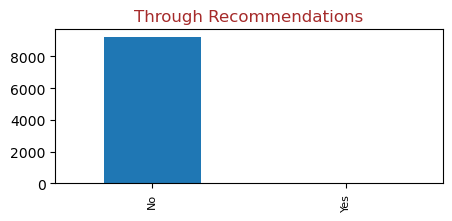

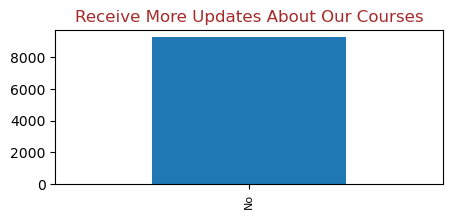

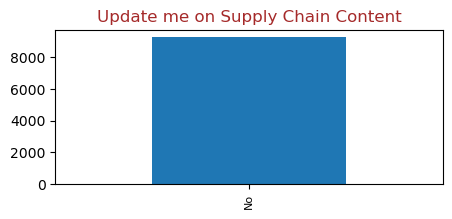

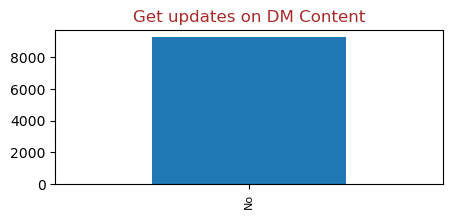

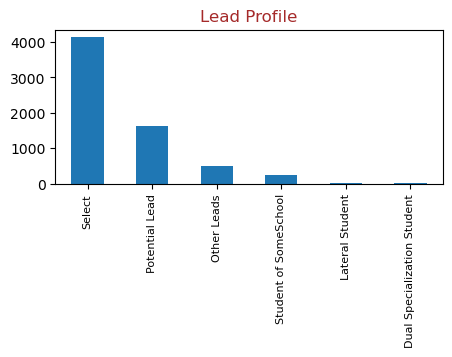

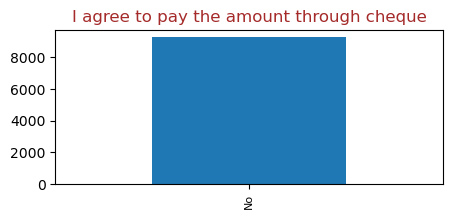

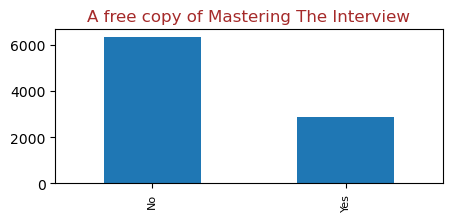

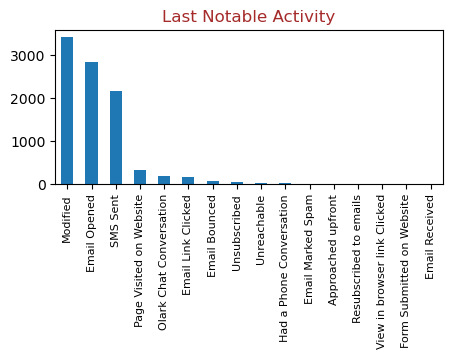

In [21]:
for i in cat_var:
    plt.figure(figsize = [5,2])
    leadscore_df[i].value_counts().plot.bar()
    plt.title(i,fontdict={'color':'brown','fontsize':12,'fontweight':5})
    plt.xticks(fontsize = 8,rotation = 90)
    plt.show()

- From the plots, we can see that there are some columns that are highly imbalanced. They are
    1. 'Do Not Call'
    2. 'What matters most to you in choosing a course'
    3. 'Search',
    4. 'Magazine'
    5. 'Newspaper Article'
    6. 'X Education Forums'
    7. 'Newspaper'
    8. 'Digital Advertisement'
    9. 'Through Recommendations'
    10. 'Get updates on DM Content'
    11. 'Receive More Updates About Our Courses'
    12. 'Update me on Supply Chain Content'
    13. 'I agree to pay the amount through cheque'
    14. 'A free copy of Mastering The Interview'
- It is best to drop them.

In [22]:
# Shape before dropping

leadscore_df.shape

(9240, 27)

In [23]:
leadscore_df = leadscore_df.drop(['Do Not Call',
                                  'What matters most to you in choosing a course',
                                  'Search','Magazine','Newspaper Article',
                                  'X Education Forums','Newspaper','Digital Advertisement',
                                  'Through Recommendations','Get updates on DM Content',
                                  'Receive More Updates About Our Courses',
                                  'Update me on Supply Chain Content',
                                  'I agree to pay the amount through cheque',
                                  'A free copy of Mastering The Interview'] ,axis = 1)

# Shape after dropping

leadscore_df.shape

(9240, 13)

In [24]:
# Checking the null percentage of the columns

((100 * leadscore_df.isnull().sum())/ len(leadscore_df)).sort_values(ascending = False)

Lead Profile                          29.318182
What is your current occupation       29.112554
How did you hear about X Education    23.885281
Specialization                        15.562771
Last Activity                          1.114719
Lead Source                            0.389610
Lead Origin                            0.000000
Do Not Email                           0.000000
Converted                              0.000000
TotalVisits                            0.000000
Total Time Spent on Website            0.000000
Page Views Per Visit                   0.000000
Last Notable Activity                  0.000000
dtype: float64

In [25]:
# segmenting the categorical variables

cat_var = leadscore_df.select_dtypes(include = 'object').columns

cat_var

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

In [26]:
# Checking the value counts for the categorical columns

for i in cat_var:
    print(leadscore_df[i].value_counts(dropna = False))
    print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

No     8506
Yes     734
Name: Do Not Email, dtype: int64

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          

- We can see that the columns `Lead Profile`, `How did you hear about X Education`, and  `Specialization` have a category called `Select`. 
- In our problem statement, it is given that 'Select' needs to be handled because it is as good as a null value. The customers may have not mentioned these detaisl. Therefore we can replace the 'Select' and null values as 'Not Mentioned'.

####  Lead Profile, How did you hear about X Education, and Specialization Variables

In [27]:
# Replacing 'Select' and null values with 'Not Provided'

for i in ['Lead Profile', 'How did you hear about X Education', 'Specialization']:
    leadscore_df[i] = leadscore_df[i].replace(['Select',np.nan],'Not Mentioned')

In [28]:
# Checking the categories of 'Lead Profile', 'How did you hear about X Education', 'Specialization'

for i in ['Lead Profile', 'How did you hear about X Education', 'Specialization']:
    print(leadscore_df[i].value_counts(dropna = False))
    print()

Not Mentioned                  6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Not Mentioned            7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Not Mentioned                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Touri

- We have successfully treated the missing values in the variables 'Lead Profile', 'How did you hear about X Education' and 'Specialization'.

In [29]:
# Checking the null percentage of the columns

((100 * leadscore_df.isnull().sum())/ len(leadscore_df)).sort_values(ascending = False)

What is your current occupation       29.112554
Last Activity                          1.114719
Lead Source                            0.389610
Lead Origin                            0.000000
Do Not Email                           0.000000
Converted                              0.000000
TotalVisits                            0.000000
Total Time Spent on Website            0.000000
Page Views Per Visit                   0.000000
Specialization                         0.000000
How did you hear about X Education     0.000000
Lead Profile                           0.000000
Last Notable Activity                  0.000000
dtype: float64

#### What is your current occupation

In [30]:
# Checking the value counts

leadscore_df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
# Checking the percentage of the categories

leadscore_df["What is your current occupation"].value_counts(normalize = True, dropna = False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

- We can see that about 29% of the values are null values. Therfore imputing or deleting them will result in bias. So, we can choose to categorize null values as 'Unknown'.

In [32]:
# Replacing null values and low frequency values to 'Others'

leadscore_df['What is your current occupation'] = leadscore_df['What is your current occupation'].replace(np.nan,'Unknown')

# Checking the value counts

leadscore_df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Last Activity

In [33]:
# Checking the value counts

leadscore_df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

- Since the number of null values is very low, we can replace them with the mode value.
- We also have low frequency values in this column. We can combine them to 'Others'.

In [34]:
# Replacing NaN with the mode

leadscore_df['Last Activity'] = leadscore_df['Last Activity'].replace(np.NaN,leadscore_df['Last Activity'].mode()[0])


# Combining low frequency values

leadscore_df['Last Activity'] = leadscore_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                                       'Had a Phone Conversation',
                                                                       'Approached upfront',
                                                                       'View in browser link Clicked',
                                                                       'Email Received','Email Marked Spam',
                                                                       'Visited Booth in Tradeshow',
                                                                       'Resubscribed to emails'],'Others')


# Checking the value counts

leadscore_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

#### Lead Source

In [35]:
# Checking the value counts

leadscore_df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- Since the number of null values is very low, we can replace them with the mode value.
- Also, we can see that there is a category 'Google' in two formats 'Google' and 'google'. Therefore, we can replace 'google' with 'Google'.
- We also have low frequency values in this column. We can combine them to 'Others'

In [36]:
# Replacing NaN with the mode

leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace(np.NaN,leadscore_df['Lead Source'].mode()[0])


# Replacing 'google' with 'Google'

leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace('google','Google')


# Combining low frequency values

leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace(['bing','Click2call','Social Media',
                                                                   'Live Chat','Press_Release','Pay per Click Ads',
                                                                   'blog','WeLearn','welearnblog_Home','youtubechannel',
                                                                  'testone','NC_EDM'],'Others')

# Checking the value counts

leadscore_df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

#### Lead Origin

In [37]:
# Checking the value counts

leadscore_df['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [38]:
# Replacing low frequency values with mode

leadscore_df['Lead Origin'] = leadscore_df['Lead Origin'].replace('Quick Add Form',
                                                                 leadscore_df['Lead Origin'].mode()[0])


# Checking the value counts

leadscore_df['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4887
API                        3580
Lead Add Form               718
Lead Import                  55
Name: Lead Origin, dtype: int64

#### Last Notable Activity

In [39]:
# Checking the value counts

leadscore_df['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [40]:
# Combining low frequency values

leadscore_df['Last Notable Activity'] = leadscore_df['Last Notable Activity'].replace(['Email Marked Spam',
                                                                                       'Approached upfront',
                                                                                       'Resubscribed to emails',
                                                                                       'View in browser link Clicked',
                                                                                       'Form Submitted on Website',
                                                                                       'Email Received'],'others')


# Checking the value counts

leadscore_df['Last Notable Activity'].value_counts(dropna = False)

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
others                         7
Name: Last Notable Activity, dtype: int64

In [41]:
# Checking the null percentage

((100*leadscore_df.isnull().sum())/len(leadscore_df)).sort_values(ascending = False)

Lead Origin                           0.0
Lead Source                           0.0
Do Not Email                          0.0
Converted                             0.0
TotalVisits                           0.0
Total Time Spent on Website           0.0
Page Views Per Visit                  0.0
Last Activity                         0.0
Specialization                        0.0
How did you hear about X Education    0.0
What is your current occupation       0.0
Lead Profile                          0.0
Last Notable Activity                 0.0
dtype: float64

- We have successfully handled the missing values in the dataframe.

## 2.4 CHECKING CLASS IMBALANCE

In [42]:
# Calculating the lead conversion rate

lead_con_rate = round(100*(sum(leadscore_df['Converted'])/len(leadscore_df)),2)

print('Lead Conversion Rate : ',lead_con_rate)

Lead Conversion Rate :  38.54


## 2.5 CATEGORICAL VARIABLES ANALYSIS AGAINST TARGET VARIABLE

In [43]:
# segmenting the categorical variables

cat_var = leadscore_df.select_dtypes(include = 'object').columns

cat_var

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

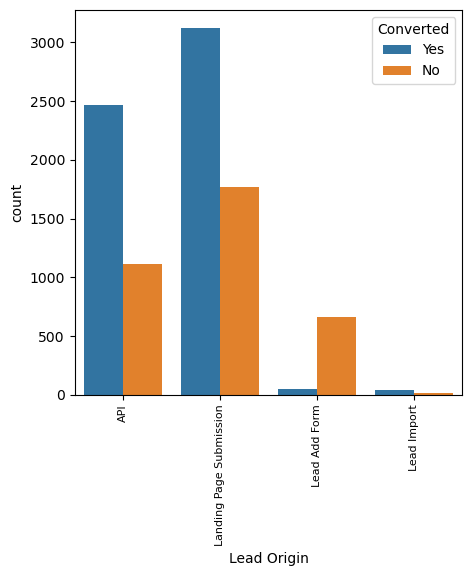

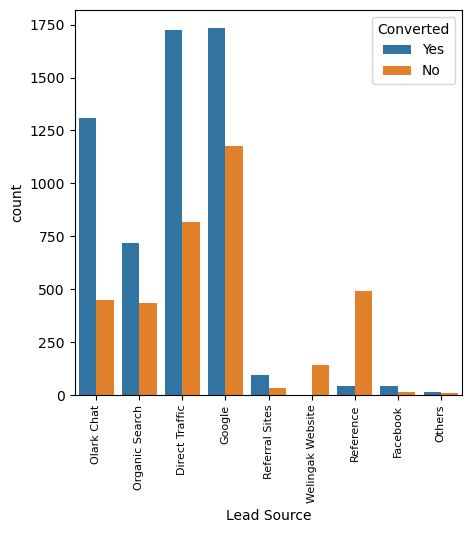

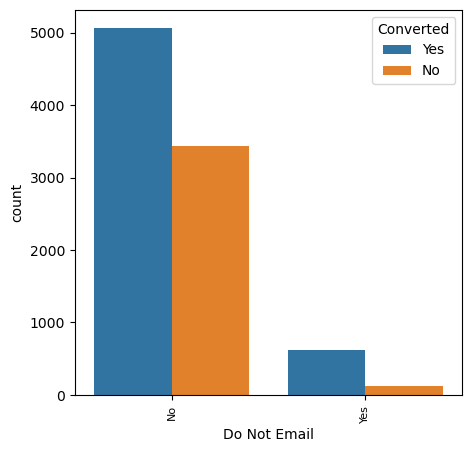

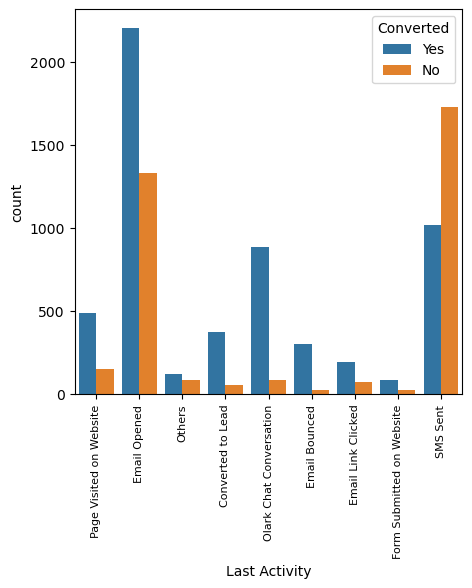

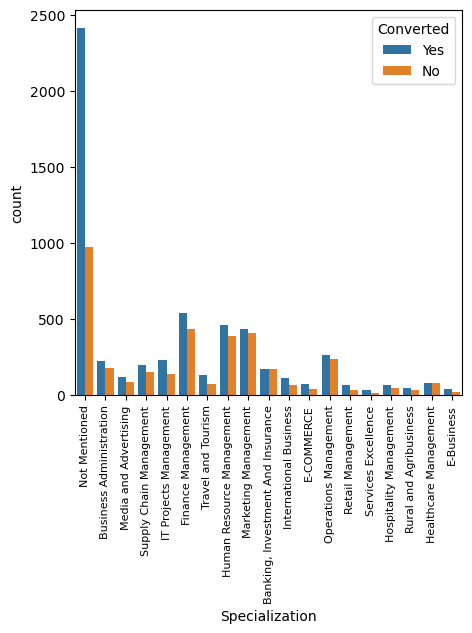

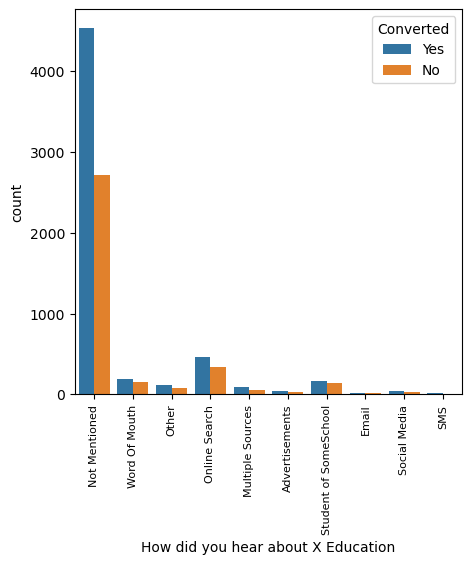

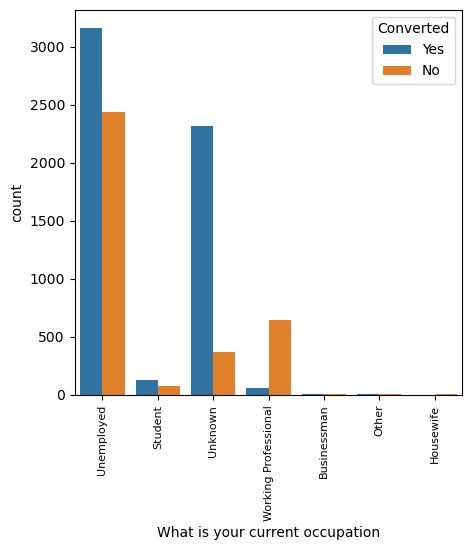

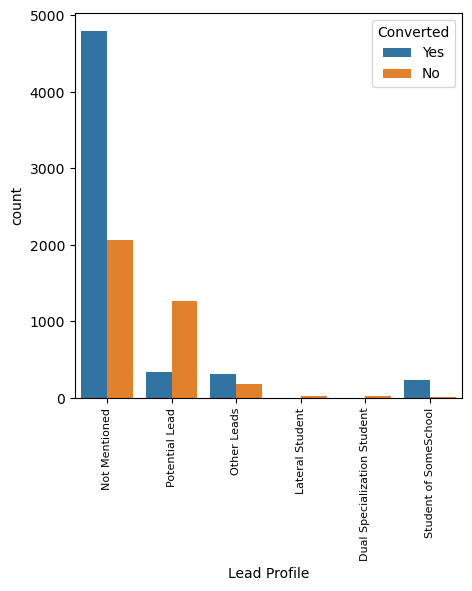

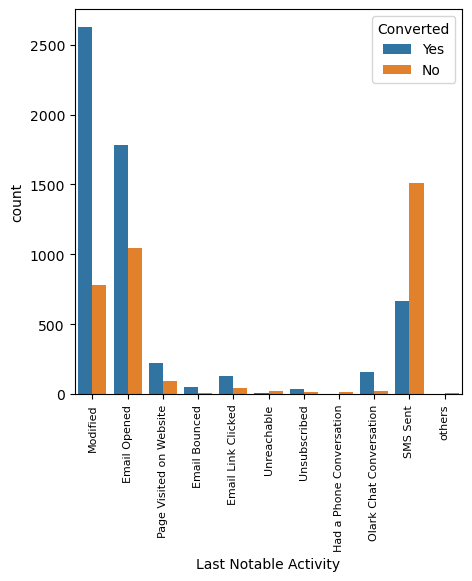

In [44]:
for i in cat_var:
    plt.figure(figsize = [5,5])
    sns.countplot(x = i, hue = "Converted", data = leadscore_df)
    plt.xticks(fontsize = 8,rotation = 90)
    plt.legend(["Yes","No"],title = "Converted", loc = 'upper right')
    plt.show()

#### Observations:

- More conversions has been made when,
   1. **Lead Origin** is Landing Page Submission
   2. **Lead Source** is Google and Direct Traffic
   3.  **Last Activity** is Email Opened
   4. **What is your current occupation** is Unemployed and Working Professionals
   5. **Last Notable Activity** is Modified 

## 2.6 NUMERICAL VARIABLES ANALYSIS AGAINST TARGET VARIABLE

In [45]:
num_var = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [46]:
# Checking the percentile values

leadscore_df[num_var].describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


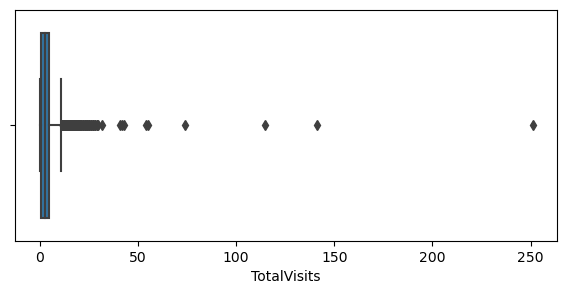

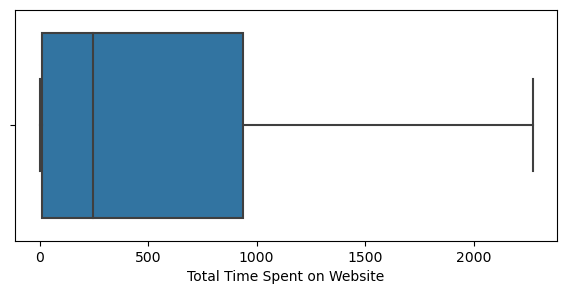

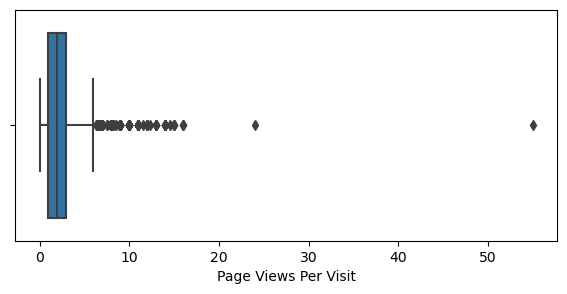

In [47]:
# Visualizing the outliers

for i in ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']:
    plt.figure(figsize = [7,3])
    sns.boxplot(leadscore_df[i])
    plt.show()

- We can clearly see the presence of outliers in the columns `TotalVisits` and `Page Views Per Visit`.

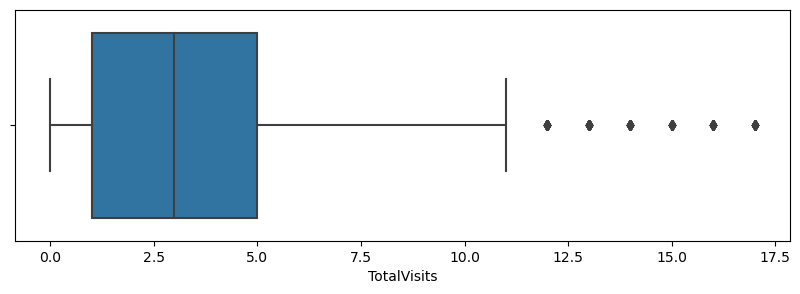

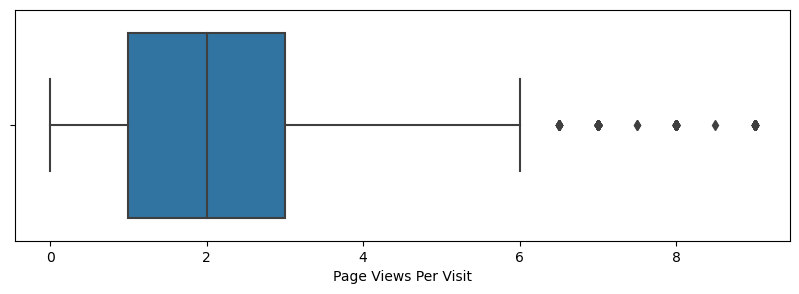

In [48]:
#Outlier Treatment: Remove top & bottom 1% 

for i in ['TotalVisits','Page Views Per Visit']:
    Q3 = leadscore_df[i].quantile(0.99)
    leadscore_df = leadscore_df[leadscore_df[i] <= Q3]
    Q1 = leadscore_df[i].quantile(0.01)
    leadscore_df = leadscore_df[leadscore_df['Page Views Per Visit'] >= Q1]
    plt.figure(figsize = [10,3])
    sns.boxplot(leadscore_df[i])
    plt.show()

- We have successfully removed the outliers for the numerical variables.

### TotalVisits vs Converted

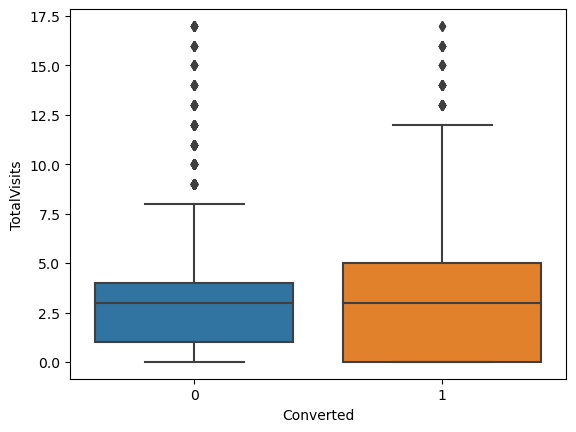

In [49]:
# Visualizing 'TotalVisits' w.r.t Target Variable 'converted'

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadscore_df)
plt.show()

- The median for both lead converted and lead non-converted are the same. So we cannot have any insights from this variable.

### Total time spent on website vs Converted

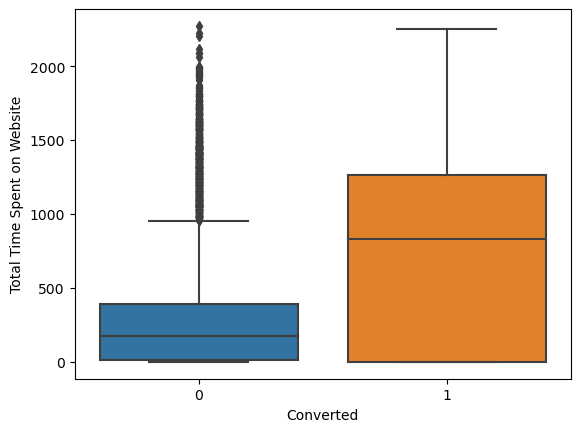

In [50]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leadscore_df)
plt.show()

- We can see that the people who have spent more time in the website are likely to become the leads.

### Page views per visit vs Converted

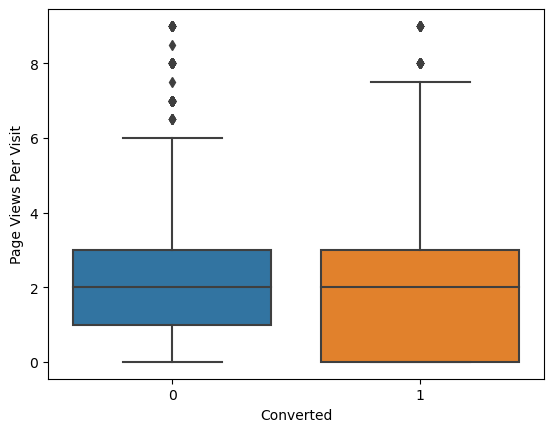

In [51]:
#visualizing spread of variable 'Page Views Per Visit'

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leadscore_df)
plt.show()

- The median for both lead converted and lead non-converted are the same. So we cannot have any insights from this variable.

## 2.7 CONVERTING BINARY VARIABLES TO 0 AND 1

In [52]:
# Viewing the dataframe

leadscore_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Not Mentioned,Unemployed,Not Mentioned,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Not Mentioned,Unemployed,Not Mentioned,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Not Mentioned,Student,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Not Mentioned,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Other,Unemployed,Not Mentioned,Modified


- From the dataset, we have only one variable `Do Not Email` that has Yes/No values that need to be converted to 1/0.

In [53]:
# Mapping 'Yes' to 1 and 'No' to 0

leadscore_df['Do Not Email'] = leadscore_df['Do Not Email'].map({'Yes':1,'No':0})

leadscore_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Not Mentioned,Unemployed,Not Mentioned,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Mentioned,Not Mentioned,Unemployed,Not Mentioned,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Not Mentioned,Student,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Not Mentioned,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Other,Unemployed,Not Mentioned,Modified


- We have successfully mapped yes/No to 1/0.

## 2.8 CREATING DUMMY VARIABLES FOR CATEGORICAL VARIABLES

- Let's create dummy variables for the categorical variables using the get_dummies command.

In [54]:
# Segmenting categorical variables

cat_var = leadscore_df.select_dtypes(include = 'object').columns

cat_var

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Profile', 'Last Notable Activity'],
      dtype='object')

In [55]:
# Creating dummy variables for the categorical variables

for i in cat_var:
    dummy_var = pd.get_dummies(leadscore_df[cat_var],drop_first = True)
    
# Viewing the dummy variables 

dummy_var.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specia

In [56]:
dummy_var.shape

(9090, 67)

In [57]:
# Concating the dummy_var dataframe to the leadscore_df

leadscore_df = pd.concat([leadscore_df,dummy_var], axis = 1)

In [58]:
# Dropping the parent variables

leadscore_df = leadscore_df.drop(leadscore_df[cat_var],axis = 1)

In [59]:
# Shape of the dataframe after creating dummy variables

leadscore_df.shape

(9090, 72)

In [60]:
# Viewing the dataframe

leadscore_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Mentioned,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Mentioned,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


- We can see that the dummy variables are added to the end of the original dataset.

# <font color = blue>STEP 3 : TRAIN-TEST SPLIT

In [61]:
# Importing sklearn package and train_test_split utility from sklearn.model_selection module

import sklearn
from sklearn.model_selection import train_test_split

In [62]:
# Separating the target and the independent varibles into two datasets

y = leadscore_df['Converted']

X = leadscore_df.drop(['Converted'], axis = 1)

In [63]:
# Independent variables

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Mentioned,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Mentioned,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [64]:
# Target variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [66]:
# Viewing the shape of the X_train, y_train, X_test and y_test set

print('The shape of the X_train is',X_train.shape)
print()
print('The shape of the y_train is',y_train.shape)
print()
print('The shape of the X_test is',X_test.shape)
print()
print('The shape of the y_test is',y_test.shape)

The shape of the X_train is (6363, 71)

The shape of the y_train is (6363,)

The shape of the X_test is (2727, 71)

The shape of the y_test is (2727,)


# <font color = blue>STEP 4 : FEATURE SCALING

-  We have a dataset that has features with different scales. So, when we obtain the coefficients by fitting the model, some coefficents may have a large value and some may have small values. This makes it difficult for us to perform model evaluation as the scales of the features are different. So, we need to make all the features in the dataset to have comparable scales. This process is called rescaling. There are two ways to rescale the variables. They are
    1. Min-Max Scaling: Here the feature values are distributed with a distribution range 0 and 1.
    2. Standardization: Here the feature values are rescaled so that they have a mean 0 and standard deviation 1.
- In this case study, we will be using Standardization.

In [67]:
# Importing the necessary libraries

from sklearn.preprocessing import StandardScaler

In [68]:
# Viewing the X_train

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Mentioned,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Mentioned,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
302,0,7.0,250,2.33,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6087,1,0.0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1033,0,5.0,470,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7656,1,6.0,352,6.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3241,0,4.0,973,1.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [69]:
# Scaling the numerical variables

scaler = StandardScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Mentioned,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Mentioned,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
302,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1033,0,0.642022,-0.025151,1.477269,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7656,1,0.989402,-0.241619,2.014065,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3241,0,0.294642,0.897591,-0.492776,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


- We can see that the values in the columns 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit' have been standatdised.

# <font color = blue>STEP 5 : CHECKING CORRELATIONS

- Let's find the correlation matrix between the target variable and the numerical variables.

In [70]:
num_var = ['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

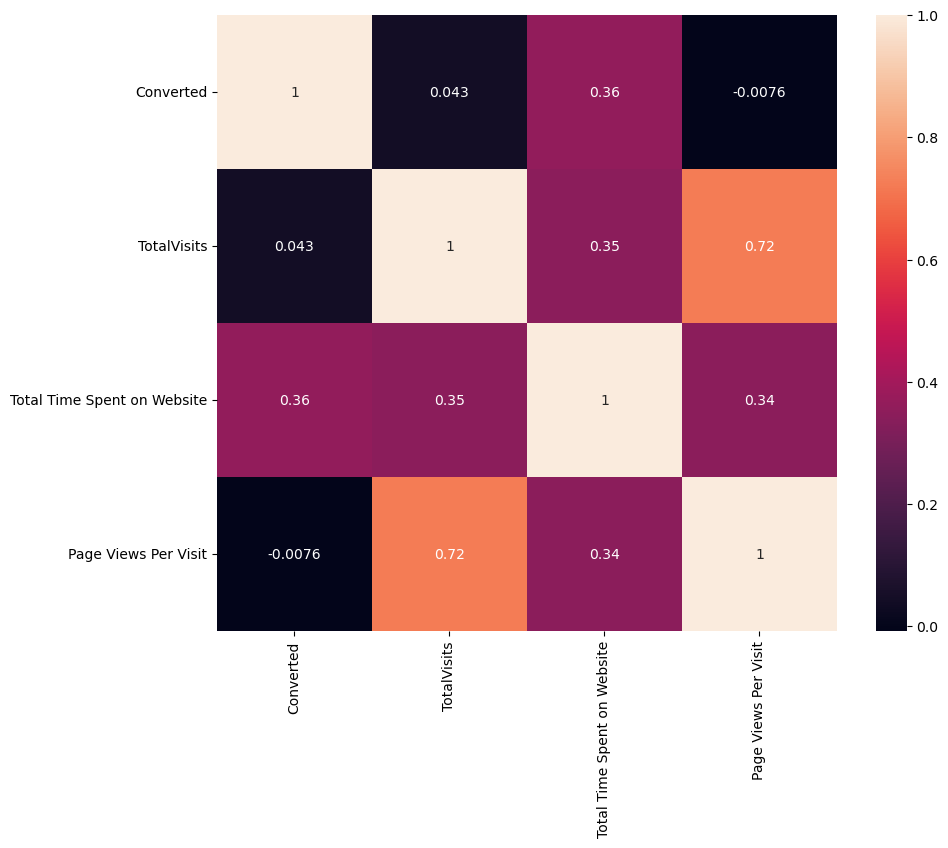

In [71]:
# Plotting the heatmap 

plt.figure(figsize=(10,8))
sns.heatmap(leadscore_df[num_var].corr(), annot = True)
plt.show()

- From the heatmap, we can see that
    1. The variables 'TotalVisits' and 'Total Time Spent on Website' are having positive correlation with the target variable.
    2. The variable 'Page Views Per Visit' is having a negative correlation with the target variable.
- The correlation coefficients are
    1. TotalVisits - 0.043
    2. Total Time Spent on Website' - 0.36
    3. Page Views Per Visit - -0.0076.

# <font color = blue>STEP 6 : MODEL BUILDING

-  We need to build a model with the potential features. The potential features can be selected by the combination of automated and manual feature selection techniques.
    1. **Automated Feature Selection :** Here we are using an algorithm namely Recursive Feature Elimination(RFE), which helps us in removing the less important features.
    2. **Manual Feature Selection :** After removing the redundant variables using RFE and building a model, some features are eliminated based on the model parameters to build a final good-fit model.

In [72]:
# Importing statsmodels

import statsmodels.api as sm

### Feature selection using RFE

In [73]:
# Importing LogisticRegression from sklearn.linear_model package

from sklearn.linear_model import LogisticRegression

# Importing RFE from sklearn.feature_selection package

from sklearn.feature_selection import RFE

In [74]:
# Creating a model object

log_reg = LogisticRegression()

In [75]:
# Running RFE with with number of output features = 15

rfe = RFE(log_reg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [76]:
# Finding the features that are selected by RFE with their ranks

list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 57),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 32),
 ('Last Activity_Email Link Clicked', False, 47),
 ('Last Activity_Email Opened', False, 19),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Adm

In [77]:
# Creating a list of top 15 columns

col = X_train.columns[rfe.support_]

col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

### Model - 1

In [78]:
# Let's build a model with the features selected by RFE

X_train_rfe = X_train[col]

# Adding a constant externally

X_train_rfe = sm.add_constant(X_train_rfe)

# Building second model

log_mod_1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()

#Viewing the statistical summary

log_mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.3
Date:                Mon, 22 May 2023   Deviance:                       4776.6
Time:                        22:27:03   Pearson chi2:                 6.81e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4395
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3175      0.069    -19.095      0.000      -1.453      -1.182
Do Not Email                                            -1.3936      0.179     -7.785      0.000      -1.744      -1.043
Total Time Spent on Website                              1.0964      0.042     26.018      0.000       1.014       1.179
Lead Origin_Lead Add Form                                3.0956      0.203     15.258      0.000       2.698       3.493
Lead Source_Olark Chat                                   1.2360      0.108     11.476      0.000       1.025       1.447
Lead Source_Welingak Website                             3.3498      1.028      3.258      0.001       1.335       5.365
Last Activity_Others                                     1.0149      0.256      3.961      0.000       0.513       1.517
Last Activity_SMS Sent                                   1.3966      0.079     17.630      0.000       1.241       1.552
What is your current occupation_Housewife               24.0315   2.27e+04      0.001      0.999   -4.45e+04    4.46e+04
What is your current occupation_Unknown                 -0.9307      0.093    -10.040      0.000      -1.112      -0.749
What is your current occupation_Working Professional     2.2708      0.193     11.788      0.000       1.893       2.648
Lead Profile_Lateral Student                             2.7103      1.088      2.492      0.013       0.579       4.842
Lead Profile_Potential Lead                              1.6104      0.103     15.580      0.000       1.408       1.813
Lead Profile_Student of SomeSchool                      -2.3032      0.444     -5.190      0.000      -3.173      -1.433
Last Notable Activity_Had a Phone Conversation          22.2853   2.29e+04      0.001      0.999   -4.49e+04     4.5e+04
Last Notable Activity_Modified                          -0.9295      0.083    -11.197      0.000      -1.092      -0.767
========================================================================================================================
"""

- From the model summary, we can see that the variable `What is your current occupation_Housewife` is highly insignificant with a p-value 0.999. We can remove this variable to build a second model. Before that, we can check the multicolinearity among the predictor variables.

#### Checking VIF

In [79]:
# Importing the library for calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Checking the VIF for model 1

VIF = pd.DataFrame()
VIF['Features'] = X_train_rfe.columns
VIF['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
0,const,3.78
3,Lead Origin_Lead Add Form,1.50
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.28
4,Lead Source_Olark Chat,1.26
12,Lead Profile_Potential Lead,1.25
9,What is your current occupation_Unknown,1.23
10,What is your current occupation_Working Profes...,1.16
7,Last Activity_SMS Sent,1.12
6,Last Activity_Others,1.10


- Now, we have the model summary and the VIFs of the variables. From them, we can find that the feature `What is your current occupation_Housewife` is highly insignificant with a p-value **0.999** and the VIF of all the features are within range. Let's drop the feature `What is your current occupation_Housewife`.

In [81]:
# Dropping 'What is your current occupation_Housewife'

col = col.drop('What is your current occupation_Housewife', 1)

col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

### Model - 2

In [82]:
X_train_rfe = X_train[col]

# Adding a constant externally

X_train_rfe = sm.add_constant(X_train_rfe)

# Building second model

log_mod_2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()

#Viewing the statistical summary

log_mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2395.6
Date:                Mon, 22 May 2023   Deviance:                       4791.2
Time:                        22:27:04   Pearson chi2:                 6.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4382
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3053      0.069    -18.985      0.000      -1.440      -1.171
Do Not Email                                            -1.3980      0.179     -7.810      0.000      -1.749      -1.047
Total Time Spent on Website                              1.0951      0.042     26.027      0.000       1.013       1.178
Lead Origin_Lead Add Form                                3.1156      0.202     15.390      0.000       2.719       3.512
Lead Source_Olark Chat                                   1.2282      0.108     11.420      0.000       1.017       1.439
Lead Source_Welingak Website                             3.3208      1.028      3.231      0.001       1.306       5.335
Last Activity_Others                                     1.0058      0.256      3.926      0.000       0.504       1.508
Last Activity_SMS Sent                                   1.3870      0.079     17.533      0.000       1.232       1.542
What is your current occupation_Unknown                 -0.9370      0.093    -10.119      0.000      -1.119      -0.756
What is your current occupation_Working Professional     2.2618      0.193     11.746      0.000       1.884       2.639
Lead Profile_Lateral Student                             2.6958      1.088      2.478      0.013       0.564       4.828
Lead Profile_Potential Lead                              1.6070      0.103     15.572      0.000       1.405       1.809
Lead Profile_Student of SomeSchool                      -2.3120      0.444     -5.211      0.000      -3.182      -1.442
Last Notable Activity_Had a Phone Conversation          21.2836   1.39e+04      0.002      0.999   -2.72e+04    2.73e+04
Last Notable Activity_Modified                          -0.9279      0.083    -11.201      0.000      -1.090      -0.766
========================================================================================================================
"""

#### Checking VIF

In [83]:
# Checking the VIF for model 2

VIF = pd.DataFrame()
VIF['Features'] = X_train_rfe.columns
VIF['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
0,const,3.77
3,Lead Origin_Lead Add Form,1.50
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.28
4,Lead Source_Olark Chat,1.26
11,Lead Profile_Potential Lead,1.25
8,What is your current occupation_Unknown,1.23
9,What is your current occupation_Working Profes...,1.15
7,Last Activity_SMS Sent,1.12
6,Last Activity_Others,1.10


- From the model summary and the VIFs, we can find that the feature `Last Notable Activity_Had a Phone Conversation` is highly insignificant with a p-value **0.999** and the VIF of all the features are within range. Let's drop the feature `Last Notable Activity_Had a Phone Conversation`.

In [84]:
# Dropping 'Last Notable Activity_Had a Phone Conversation'

col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified'],
      dtype='object')

### Model - 3

In [85]:
X_train_rfe = X_train[col]

# Adding a constant externally

X_train_rfe = sm.add_constant(X_train_rfe)

# Building second model

log_mod_3 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()

#Viewing the statistical summary

log_mod_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2397.9
Date:                Mon, 22 May 2023   Deviance:                       4795.9
Time:                        22:27:04   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4378
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3029      0.069    -18.961      0.000      -1.438      -1.168
Do Not Email                                            -1.4134      0.179     -7.896      0.000      -1.764      -1.063
Total Time Spent on Website                              1.0945      0.042     26.026      0.000       1.012       1.177
Lead Origin_Lead Add Form                                3.1133      0.203     15.370      0.000       2.716       3.510
Lead Source_Olark Chat                                   1.2263      0.108     11.402      0.000       1.016       1.437
Lead Source_Welingak Website                             3.3256      1.028      3.235      0.001       1.311       5.340
Last Activity_Others                                     1.1153      0.246      4.532      0.000       0.633       1.598
Last Activity_SMS Sent                                   1.3871      0.079     17.529      0.000       1.232       1.542
What is your current occupation_Unknown                 -0.9382      0.093    -10.132      0.000      -1.120      -0.757
What is your current occupation_Working Professional     2.2572      0.193     11.718      0.000       1.880       2.635
Lead Profile_Lateral Student                             2.6937      1.088      2.476      0.013       0.562       4.826
Lead Profile_Potential Lead                              1.6135      0.103     15.654      0.000       1.412       1.816
Lead Profile_Student of SomeSchool                      -2.3120      0.444     -5.211      0.000      -3.181      -1.442
Last Notable Activity_Modified                          -0.9348      0.083    -11.290      0.000      -1.097      -0.773
========================================================================================================================
"""

#### Checking VIF

In [86]:
# Checking the VIF for model 2

VIF = pd.DataFrame()
VIF['Features'] = X_train_rfe.columns
VIF['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
0,const,3.77
3,Lead Origin_Lead Add Form,1.50
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.27
4,Lead Source_Olark Chat,1.26
11,Lead Profile_Potential Lead,1.25
8,What is your current occupation_Unknown,1.23
9,What is your current occupation_Working Profes...,1.15
7,Last Activity_SMS Sent,1.12
13,Last Notable Activity_Modified,1.09


- We can see that, the p-values and VIFs of all the features are within the range stating that these features are significant. Therefore, we can use this model to predict the values.

### Finding the probability values of lead getting converted on the train set

In [87]:
# Finding the probability values

y_train_pred = log_mod_3.predict(X_train_rfe)

y_train_pred.head()

302     0.062365
6087    0.012944
1033    0.209089
7656    0.168875
3241    0.743941
dtype: float64

- Now, we have the probability values of the actual values in the target variable 'Converted'.

### Creating a dataframe with the actual lead flags and their probability values

In [88]:
y_train_pred_final = pd.DataFrame({'Lead_Converted':y_train,'Lead_Prob':y_train_pred})

y_train_pred_final.head()

,Lead_Converted,Lead_Prob
302,0,0.062365
6087,0,0.012944
1033,0,0.209089
7656,0,0.168875
3241,1,0.743941


- We only have the probability values with which we cannot actually classify the customers as lead converted or not. We need a threshold probability for the classification. In this case, lets choose 0.5 as the threshold value arbitrarily. If the probability is less than 0.5 then the customer is classified as lead not converted and if the probability is greater than 0.5, the customer is classified as lead converted.

### Creating a new column 'Predicted' with 1 if Lead_Prob > 0.5 else 0

In [89]:
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Lead_Converted,Lead_Prob,Predicted
302,0,0.062365,0
6087,0,0.012944,0
1033,0,0.209089,0
7656,0,0.168875,0
3241,1,0.743941,1


#### Confusion Matrix

In [90]:
# Importing metrics from sklearn

from sklearn import metrics 

In [91]:
# Finding the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Lead_Converted,y_train_pred_final.Predicted)

confusion

array([[3516,  419],
       [ 655, 1773]], dtype=int64)

In [92]:
# True Negatives

TN = confusion[0,0] 

# False Positives

FP = confusion[0,1] 

# False Negatives

FN = confusion[1,0]

# True Positives

TP = confusion[1,1]

#### Accuracy, Sensitivity, Specificity, Precision, Recall, Positive Predictive Value ,Negative Predictive Value, True Positive Rate, False Positive Rate

In [93]:
# Finding the accuracy

accuracy = metrics.accuracy_score(y_train_pred_final.Lead_Converted,y_train_pred_final.Predicted)
print('Accuracy -',round(accuracy,2))

# Sensitivity

sensitivity = TP/(TP+FN)
print('Sensitivity -',round(sensitivity,2))

# Specificity

specificity = TN/(TN+FP)
print('Specificity -',round(specificity,2))

# Precision

precision = TP/(TP+FP)
print('Precision -',round(precision,2))

# Recall

recall = TP/(TP+FN)
print('Recall -',round(recall,2))

# Positive Predictive Value

PPV = TP /(TP + FP)
print('Positive Predictive Value -',round(PPV,2))

# Negative Predictive Value

NPV = TN /(TN + FN)
print('Negative Predictive Value -',round(NPV,2))

# True Positive Rate

TPR = TP/(TP + FN)
print('True Positive Rate -',round(TPR,2))

# False Positive Rate

FPR = FP/(TN + FP)
print('False Positive Rate -',round(FPR,2))

Accuracy - 0.83
Sensitivity - 0.73
Specificity - 0.89
Precision - 0.81
Recall - 0.73
Positive Predictive Value - 0.81
Negative Predictive Value - 0.84
True Positive Rate - 0.73
False Positive Rate - 0.11


# <font color = blue>STEP 7 : PLOTTING ROC

An ROC curve demonstrates several things:

- An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )  # Area under curve
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--') # Plotting the line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

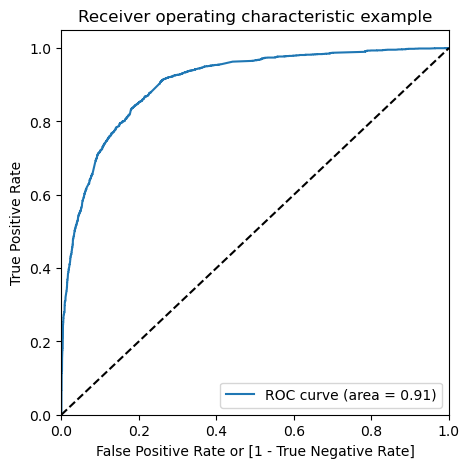

In [95]:
draw_roc(y_train_pred_final.Lead_Converted,y_train_pred_final.Lead_Prob)

# <font color = blue>STEP 8 : FINDING OPTIMAL THRESHOLD VALUE

- Find the optimal threshold in order to get a decent accuracy, sensitivity, as well as specificity.

In [96]:
# Creating columns with different probability cutoffs

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_train_pred_final[i] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Lead_Converted,Lead_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.062365,0,1,0,0,0,0,0,0,0,0,0
6087,0,0.012944,0,1,0,0,0,0,0,0,0,0,0
1033,0,0.209089,0,1,1,1,0,0,0,0,0,0,0
7656,0,0.168875,0,1,1,0,0,0,0,0,0,0,0
3241,1,0.743941,1,1,1,1,1,1,1,1,1,0,0


In [97]:
# Calculating accuracy, sensitivity and specificity

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead_Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381581     1.000000     0.000000
0.1   0.1  0.653623     0.974053     0.455909
0.2   0.2  0.791608     0.924629     0.709530
0.3   0.3  0.815967     0.861614     0.787802
0.4   0.4  0.828069     0.794481     0.848793
0.5   0.5  0.831212     0.730231     0.893520
0.6   0.6  0.819268     0.651153     0.922999
0.7   0.7  0.803552     0.571252     0.946887
0.8   0.8  0.780292     0.472405     0.970267
0.9   0.9  0.738960     0.336903     0.987039


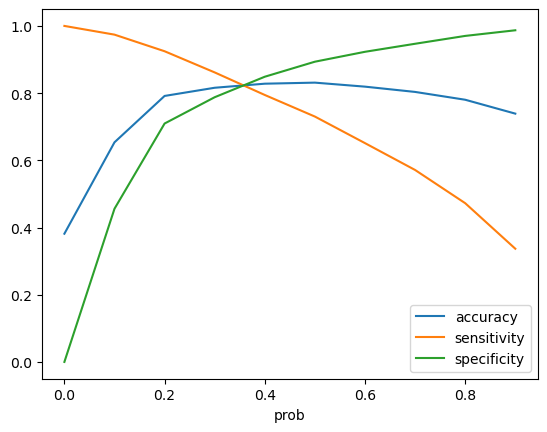

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

- From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [99]:
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead_Converted,Lead_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.062365,0,1,0,0,0,0,0,0,0,0,0
6087,0,0.012944,0,1,0,0,0,0,0,0,0,0,0
1033,0,0.209089,0,1,1,1,0,0,0,0,0,0,0
7656,0,0.168875,0,1,1,0,0,0,0,0,0,0,0
3241,1,0.743941,1,1,1,1,1,1,1,1,1,0,0


In [100]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Lead_Converted','Lead_Prob','Predicted','Lead_Score']].head()

,Lead_Converted,Lead_Prob,Predicted,Lead_Score
302,0,0.062365,0,6
6087,0,0.012944,0,1
1033,0,0.209089,0,21
7656,0,0.168875,0,17
3241,1,0.743941,1,74


In [101]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Lead_Converted']==1,['Lead_Converted','Predicted']]
checking_df['Predicted'].value_counts()

1    2092
0     336
Name: Predicted, dtype: int64

In [102]:
# check the precentage of final_predicted conversions

2054/(2054+374)

0.8459637561779242

- Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

#### Confusion Matrix

In [103]:
# Finding the confusion matrix when threshold = 0.3

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Lead_Converted, y_train_pred_final.Predicted )

confusion_2

array([[3100,  835],
       [ 336, 2092]], dtype=int64)

In [104]:
# True Negatives

TN = confusion_2[0,0] 

# False Positives

FP = confusion_2[0,1] 

# False Negatives

FN = confusion_2[1,0]

# True Positives

TP = confusion_2[1,1]

#### Accuracy, Sensitivity, Specificity, Precision, Recall, Positive Predictive Value ,Negative Predictive Value, True Positive Rate, False Positive Rate

In [105]:
# Finding the accuracy

accuracy = metrics.accuracy_score(y_train_pred_final.Lead_Converted,y_train_pred_final.Predicted)
print('Accuracy -',round(accuracy,2))

# Sensitivity

sensitivity = TP/(TP+FN)
print('Sensitivity -',round(sensitivity,2))

# Specificity

specificity = TN/(TN+FP)
print('Specificity -',round(specificity,2))

# Precision

precision = TP/(TP+FP)
print('Precision -',round(precision,2))

# Recall

recall = TP/(TP+FN)
print('Recall -',round(recall,2))

# Positive Predictive Value

PPV = TP /(TP + FP)
print('Positive Predictive Value -',round(PPV,2))

# Negative Predictive Value

NPV = TN /(TN + FN)
print('Negative Predictive Value -',round(NPV,2))

# True Positive Rate

TPR = TP/(TP + FN)
print('True Positive Rate -',round(TPR,2))

# False Positive Rate

FPR = FP/(TN + FP)
print('False Positive Rate -',round(FPR,2))

Accuracy - 0.82
Sensitivity - 0.86
Specificity - 0.79
Precision - 0.71
Recall - 0.86
Positive Predictive Value - 0.71
Negative Predictive Value - 0.9
True Positive Rate - 0.86
False Positive Rate - 0.21


### Precision-Recall Tradeoff

In [106]:
# Import precision_recall_curve 

from sklearn.metrics import precision_recall_curve

In [107]:
p,r,threshold = precision_recall_curve(y_train_pred_final.Lead_Converted, y_train_pred_final.Lead_Prob)

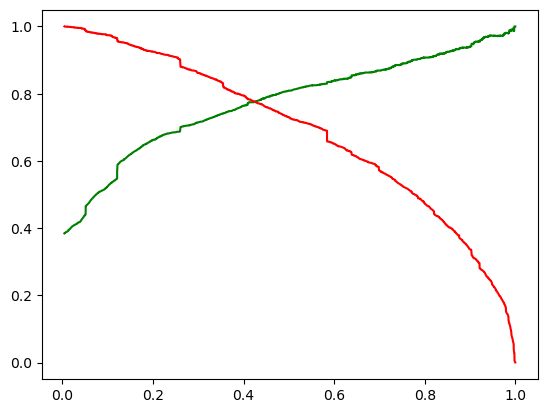

In [108]:
# Plotting Precision-Recall Tradeoff

plt.plot(threshold,p[:-1],'g-')
plt.plot(threshold,r[:-1], 'r-')
plt.show()

- Based on the Business problem we can either choose the "Sensitivity and Specificity tradeoff" or "precision and recall tradeoff"

- As our problem statement is to increase the lead converation rate we want our model to predict the 1's (Lead getting converted to paying customer) so we are choosing optimum cutoff value based on the sensitivity and specificity tradeoff.

# <font color = blue>STEP 9 : MAKING PREDICTIONS ON TEST SET

### Applying scaling on test set

In [109]:
#scaling test set

num_cols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Mentioned,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Not Mentioned,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
6906,0,0.306196,1.891958,-0.154745,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1873,0,-0.386173,-0.542475,-0.154745,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
771,0,1.344750,-0.790628,2.446282,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4495,0,0.306196,-0.618551,0.885666,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
9061,0,-0.386173,2.359282,-0.154745,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [110]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified
6906,0,1.891958,0,0,0,0,1,0,0,0,1,0,0
1873,0,-0.542475,0,0,0,0,1,0,0,0,0,0,1
771,0,-0.790628,0,0,0,0,0,0,0,0,0,0,0
4495,0,-0.618551,0,0,0,0,0,0,0,0,0,0,0
9061,0,2.359282,0,0,0,0,0,1,0,0,0,0,1


In [111]:
# Adding constant to X_test

X_test_sm = sm.add_constant(X_test)

# Making predictions on the y_test using model 3

y_test_pred = log_mod_3.predict(X_test_sm)

y_test_pred.head()

6906    0.977432
1873    0.190875
771     0.102642
4495    0.121332
9061    0.355767
dtype: float64

In [112]:
# Converting y_test_pred array to dataframe

y_test_pred_df = pd.DataFrame(y_test_pred)

y_test_pred_df.head()

,0
6906,0.977432
1873,0.190875
771,0.102642
4495,0.121332
9061,0.355767


In [113]:
# Converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

y_test_df.head()

,Converted
6906,1
1873,0
771,0
4495,0
9061,1


In [114]:
# Appending the dataframes side by side

y_test_final = pd.concat([y_test_df,y_test_pred_df],axis = 1)

y_test_final.head()

,Converted,0
6906,1,0.977432
1873,0,0.190875
771,0,0.102642
4495,0,0.121332
9061,1,0.355767


In [115]:
# Renaming the column

y_test_final = y_test_final.rename(columns = {0 : 'Lead_prob'})

y_test_final.head()

,Converted,Lead_prob
6906,1,0.977432
1873,0,0.190875
771,0,0.102642
4495,0,0.121332
9061,1,0.355767


In [116]:
# Assigning Lead Score

y_test_final['Lead_Score'] = y_test_final.Lead_prob.map( lambda x: round(x*100))

y_test_final.head()

,Converted,Lead_prob,Lead_Score
6906,1,0.977432,98
1873,0,0.190875,19
771,0,0.102642,10
4495,0,0.121332,12
9061,1,0.355767,36


##### Making predictions based on the cutoff point based on Sensitivity and Specificity:

In [117]:
y_test_final['Predicted'] = y_test_final.Lead_prob.map(lambda x: 1 if x > 0.3 else 0)

y_test_final.head()

,Converted,Lead_prob,Lead_Score,Predicted
6906,1,0.977432,98,1
1873,0,0.190875,19,0
771,0,0.102642,10,0
4495,0,0.121332,12,0
9061,1,0.355767,36,1


In [118]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_test_df = y_test_final.loc[y_test_final['Converted']==1,['Converted','Predicted']]

checking_test_df['Predicted'].value_counts()

1    902
0    165
Name: Predicted, dtype: int64

In [119]:
902/(902+165)

0.845360824742268

# <font color = blue>STEP 10 : MODEL EVALUATION

#### Confusion Matrix

In [120]:
# Finding the confusion matrix when threshold = 0.3

confusion = metrics.confusion_matrix(y_test_final.Converted, y_test_final.Predicted )

confusion

array([[1298,  362],
       [ 165,  902]], dtype=int64)

In [121]:
# True Negatives

TN = confusion[0,0] 

# False Positives

FP = confusion[0,1] 

# False Negatives

FN = confusion[1,0]

# True Positives

TP = confusion[1,1]

#### Accuracy, Sensitivity, Specificity, Precision, Recall, Positive Predictive Value ,Negative Predictive Value, True Positive Rate, False Positive Rate

In [122]:
# Finding the accuracy

accuracy = metrics.accuracy_score(y_train_pred_final.Lead_Converted,y_train_pred_final.Predicted)
print('Accuracy -',round(accuracy,2))

# Sensitivity

sensitivity = TP/(TP+FN)
print('Sensitivity -',round(sensitivity,2))

# Specificity

specificity = TN/(TN+FP)
print('Specificity -',round(specificity,2))

# Precision

precision = TP/(TP+FP)
print('Precision -',round(precision,2))

# Recall

recall = TP/(TP+FN)
print('Recall -',round(recall,2))

# Positive Predictive Value

PPV = TP /(TP + FP)
print('Positive Predictive Value -',round(PPV,2))

# Negative Predictive Value

NPV = TN /(TN + FN)
print('Negative Predictive Value -',round(NPV,2))

# True Positive Rate

TPR = TP/(TP + FN)
print('True Positive Rate -',round(TPR,2))

# False Positive Rate

FPR = FP/(TN + FP)
print('False Positive Rate -',round(FPR,2))

Accuracy - 0.82
Sensitivity - 0.85
Specificity - 0.78
Precision - 0.71
Recall - 0.85
Positive Predictive Value - 0.71
Negative Predictive Value - 0.89
True Positive Rate - 0.85
False Positive Rate - 0.22


# <font color = blue>SUMMARY

In [123]:
# Listing the variables with their coefficients

log_mod_3.params

const                                                  -1.302899
Do Not Email                                           -1.413358
Total Time Spent on Website                             1.094459
Lead Origin_Lead Add Form                               3.113291
Lead Source_Olark Chat                                  1.226329
Lead Source_Welingak Website                            3.325618
Last Activity_Others                                    1.115349
Last Activity_SMS Sent                                  1.387078
What is your current occupation_Unknown                -0.938224
What is your current occupation_Working Professional    2.257155
Lead Profile_Lateral Student                            2.693674
Lead Profile_Potential Lead                             1.613543
Lead Profile_Student of SomeSchool                     -2.311967
Last Notable Activity_Modified                         -0.934799
dtype: float64

### Top 3 important features:
- Lead Source_Welingak Website 
- Lead Origin_Lead Add Form
- Lead Profile_Lateral Student 

### Evaluation Metrics on train data:

- Accuracy - 0.82
- Sensitivity - 0.86
- Specificity - 0.79
- Precision - 0.71
- Recall - 0.86

### Evaluation Metrics on test data:

- Accuracy - 0.81
- Sensitivity - 0.84
- Specificity - 0.78
- Precision - 0.71
- Recall - 0.85

### Lead Conversion Rate:

- The target lead conversion rate to be around 85% as expected by the CEO of X Education.

### Conclusion:
1. We calculated both Sensitivity-Specificity tradeoff and Precision-Recall tradeoff. We chose the optimal cutoff based on the Sensitivity-Specificity tradeoff and predicted the test data with optimal cutoff 0.3.
2. Based on it, we obtained 81% Accuracy, 84% Sensitivity and 78% Specificity, which shows that our model is good model.